<div>
 <img src="https://media4.giphy.com/media/l0DEKnWCEnW5FeyJi/giphy.gif?cid=ecf05e4746d3984002acd52b8f247fcf58cca1a853f0f0fe&rid=giphy.gif" >

<h1><center>📚Book-Crossing Analysis📚</center></h1>
<br>
This dataset contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books. 
<br>
 <br>
</div>

> 📖**Dataset description**:
* `BX-Books.csv` has 8 columns which include information about books. 
 <ul style="list-style-type:circle;">
    <li>We can uniquely identify each book with the help of ISBN(International Standard Book Number). </li>
    <li>The title, author,publisher and year of publication of each book have been listed. </li>
    <li>The last three columns include the URLs for different sizes of images.</li>
    </ul>
* `BX-Users.csv` lists the age and location of a user along with their User-ID.
* `BX-Book-Ratings.csv` contains book ratings given by users. The User-ID and ISBN have also been provided.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install pandas_profiling

  Preparing metadata (setup.py) ... done
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.0 MB/s eta 0:00:005.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 3.5 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 5.6 MB/s eta 0:00:006.3 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27083 sha256=91dc694a8fac7518d122adea28c6957642cf1e40621dc605a6f3774434e33822
  Stored in directory: /home/baoluong/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

<div class="alert alert-warning" role="alert">
  <h3><strong>Imports</strong></h3>
</div>

In [2]:
#import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import requests

from PIL import Image as im
from wordcloud import WordCloud,STOPWORDS
from IPython.core.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

In [11]:
pip install colorama

Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install pydantic 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.3 MB/s eta 0:00:002.5 MB/s eta 0:00:01
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.23.2
    Uninstalling pydantic_core-2.23.2:
      Successfully uninstalled pydantic_core-2.23.2


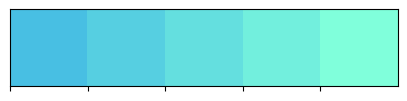

In [3]:
custom_colors = ['#48bfe3','#56cfe1','#64dfdf','#72efdd','#80ffdb']
customPalette = sns.color_palette(custom_colors)
sns.palplot(sns.color_palette(custom_colors),size=1)

sns.set_context("poster")

<div class="alert alert-warning" role="alert">
  <h3><strong>Reading the 3 csv files</strong></h3>
</div>

In [6]:
import os 
os.listdir("../data")

['Book reviews', 'Books Data with Category Language and Summary']

In [7]:
#Users
u_cols = ['user_id', 'location', 'age']
users = pd.read_csv('../data/Book reviews/BX-Users.csv', sep=';', names=u_cols, encoding='latin-1',low_memory=False)

#Books
i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
items = pd.read_csv('../data/Book reviews/BX_Books.csv', sep=';', names=i_cols, encoding='latin-1',low_memory=False)

#Ratings
r_cols = ['user_id', 'isbn', 'rating']
ratings = pd.read_csv('../data/Book reviews/BX-Book-Ratings.csv', sep=';', names=r_cols, encoding='latin-1',low_memory=False)

<div class="alert alert-warning" role="alert">
  <h3><strong>What does the data look like?</strong></h3>
</div>

In [8]:
users.head(5)

,user_id,location,age
0,User-ID,Location,Age
1,1,"nyc, new york, usa",NaN
2,2,"stockton, california, usa",18
3,3,"moscow, yukon territory, russia",NaN
4,4,"porto, v.n.gaia, portugal",17


In [9]:
users.describe()

,user_id,location,age
count,278859,278859,168097
unique,278859,57340,166
top,User-ID,"london, england, united kingdom",24
freq,1,2506,5687


In [10]:
print(f"{y_}{users.dtypes}\n") 

user_id     object
location    object
age         object
dtype: object



In [11]:
items.head(5)

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [12]:
items.describe()

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
count,271380,271380,271378,271380,271378,271380,271380,271380
unique,271380,242155,102028,117,16806,271064,271064,271064
top,ISBN,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/074343045X.0...,http://images.amazon.com/images/P/074343045X.0...,http://images.amazon.com/images/P/074343045X.0...
freq,1,27,632,17628,7536,2,2,2


In [13]:
print(f"{y_}{items.dtypes}\n") 

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
img_s                  object
img_m                  object
img_l                  object
dtype: object



In [14]:
ratings.head(5)

,user_id,isbn,rating
0,User-ID,ISBN,Book-Rating
1,276725,034545104X,0
2,276726,0155061224,5
3,276727,0446520802,0
4,276729,052165615X,3


In [12]:
ratings.describe()

,user_id,isbn,rating
count,1149781,1149781,1149781
unique,105284,340557,12
top,11676,0971880107,0
freq,13602,2502,716109


In [15]:
print(f"{y_}{ratings.dtypes}\n") 

user_id    object
isbn       object
rating     object
dtype: object



In [16]:
users = users.drop(users.index[0])
items = items.drop(items.index[0])
ratings = ratings.drop(ratings.index[0])

<div class="alert alert-warning" role="alert">
  <h3><strong>Changing datatypes and replacing nan values</strong></h3>
</div>

In [17]:
users['age'] = users['age'].astype(float)
users['user_id'] = users['user_id'].astype(int)
ratings['user_id'] = ratings['user_id'].astype(int)
ratings['rating'] = ratings['rating'].astype(int)
items['year_of_publication'] = items['year_of_publication'].astype(int)

In [18]:
users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [19]:
users['age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: age, dtype: float64

In [20]:
users.loc[(users.age>99) | (users.age<5),'age'] = np.nan
users.age = users.age.fillna(users.age.mean())

In [21]:
ratings.isnull().sum()

user_id    0
isbn       0
rating     0
dtype: int64

In [22]:
items.isnull().sum()

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
img_s                  0
img_m                  0
img_l                  0
dtype: int64

In [23]:
items.loc[items.publisher.isnull(),:]

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
128897,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129044,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [24]:
items.loc[items.isbn=='193169656X','publisher']='Mundania Press LLC'
items.loc[items.isbn=='1931696993','publisher']='Novelbooks Incorporated'

In [25]:
items.loc[items.book_author.isnull(),:]

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
118039,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187701,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [26]:
items.loc[items.isbn=='9627982032','book_author']='Larissa Anne Downe'

In [27]:
print(sorted(items['year_of_publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [28]:
items.loc[(items.year_of_publication==0)|(items.year_of_publication>2008) ,'year_of_publication' ] = np.nan
items.year_of_publication = items.year_of_publication.fillna(round(items.year_of_publication.mean()))

<div class="alert alert-warning" role="alert">
  <h3><strong>Merging the dataframes using User-ID and ISBN columns</strong></h3>
</div>

In [29]:
df = pd.merge(users, ratings, on='user_id')
df = pd.merge(df, items, on='isbn')
df.head(5)

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,8,"timmins, ontario, canada",34.7439,0060973129,0,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,8,"timmins, ontario, canada",34.7439,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,8,"timmins, ontario, canada",34.7439,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [30]:
df.shape

(1031175, 12)

<div class="alert alert-warning" role="alert">
  <h3><strong>Spitting location column into newer columns</strong></h3>
</div>

In [31]:
location = df.location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

df['city'] = location['city']
df['state'] = location['state']
df['country'] = location['country']

<div class="alert alert-warning" role="alert">
  <h3><strong>Fetching images of different sizes from the URLs</strong></h3>
</div>

In [ ]:
def images(col,i):
    url = df[col][i]
    print
    response = requests.get(url)
    img = Image(url)
    return img

In [43]:
import requests

with open('pic1.jpg', 'wb') as handle:
    response = requests.get("https://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg", stream=True)

    if not response.ok:
        print(response)

    for block in response.iter_content(1024):
        if not block:
            break

        handle.write(block)

<Response [403]>


In [44]:
response = requests.get("https://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg")
#save the image
file = open("img.jpg", "wb")
file.write(response.content)
file.close()

In [35]:
images('img_s',0)

http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg


HTTPError: HTTP Error 403: Forbidden

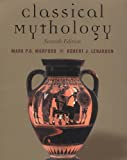

In [32]:
images('img_m',0)

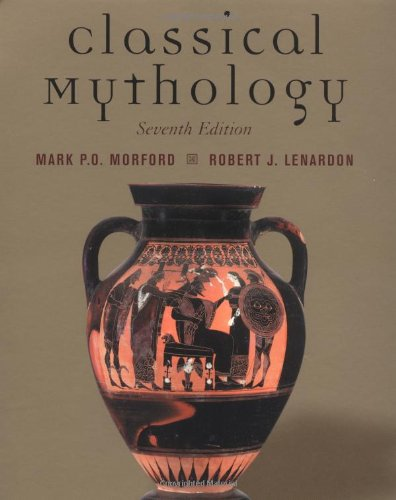

In [33]:
images('img_l',0)

<div class="alert alert-warning" role="alert">
  <h3><strong>Dropping columns we won't be needing</strong></h3>
</div>

In [34]:
df = df.drop(['location','img_s','img_m','img_l'], axis = 1)

In [35]:
df.dtypes

user_id                  int64
age                    float64
isbn                    object
rating                   int64
book_title              object
book_author             object
year_of_publication    float64
publisher               object
city                    object
state                   object
country                 object
dtype: object

<div class="alert alert-warning" role="alert">
  <h3><strong>Pandas Profiling</strong></h3>
</div>

In [36]:
# profile = pandas_profiling.ProfileReport(df)
# profile

<div class="alert alert-warning" role="alert">
  <h3><strong>Rating Distribution</strong></h3>
</div>

> 📌Note: This dataset contains both **explicit** ratings, on a 1–10 scale and **implicit** actions of unspecified nature. 

> 0 values indicate all interactions without rating values.

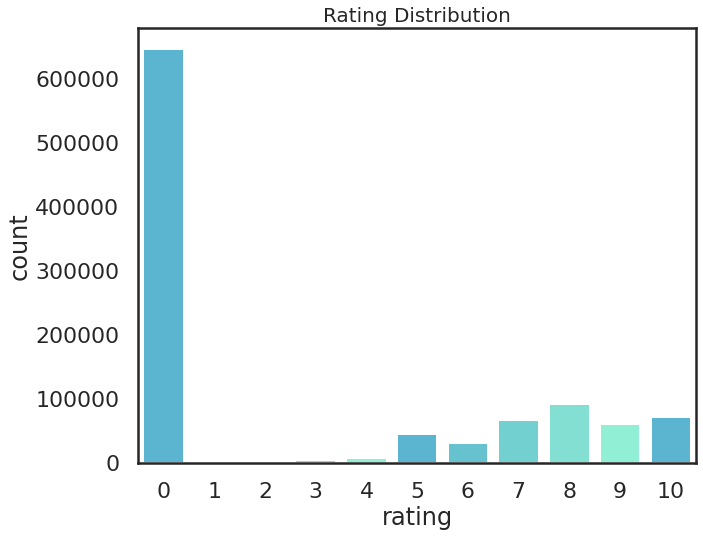

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',data=df,palette=customPalette)
plt.title('Rating Distribution',size=20)
plt.show()

In [38]:
df['rating'].value_counts()

0     647323
8      91806
10     71227
7      66404
9      60780
5      45355
6      31689
4       7617
3       5118
2       2375
1       1481
Name: rating, dtype: int64

> Analysing the rating distribution and the value counts of the ratings column in the dataframe, we notice the that the number of implicit ratings are significantly high!

<div class="alert alert-warning" role="alert">
  <h3><strong>Explicit Rating Distribution</strong></h3>
</div>

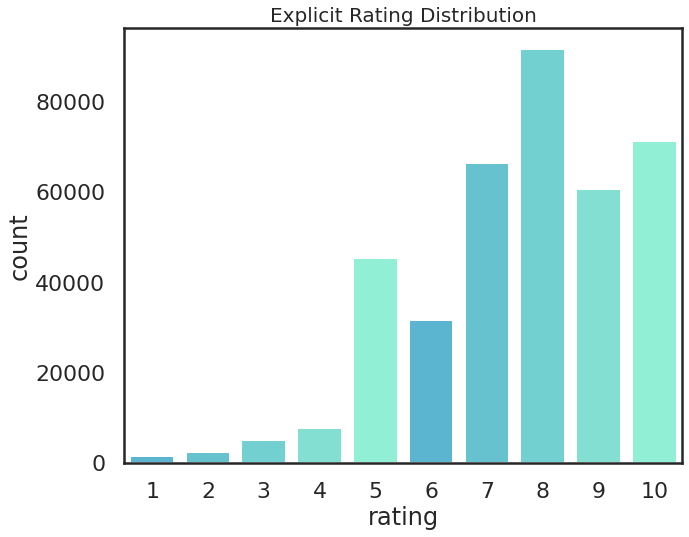

In [39]:
df_v=df[['rating']].copy()
df_v.dtypes
df_v = df_v[df_v.rating != 0]
plt.figure(figsize=(10,8))
sns.countplot(x='rating',data=df_v,palette=customPalette)
plt.title('Explicit Rating Distribution',size=20)
plt.show()

Users generally give higher ratings to books as per the above distribution,

<div class="alert alert-warning" role="alert">
  <h3><strong>Distribution of age of users</strong></h3>
</div>

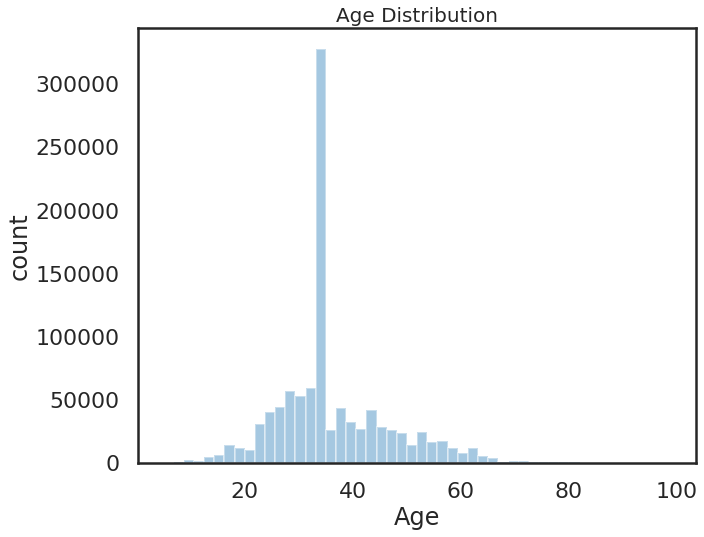

In [40]:
plt.figure(figsize=(10,8))
sns.distplot(df['age'],kde=False)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution',size=20)
plt.show()

<div class="alert alert-warning" role="alert">
  <h3><strong>Top 25 Years of Publication</strong></h3>
</div>

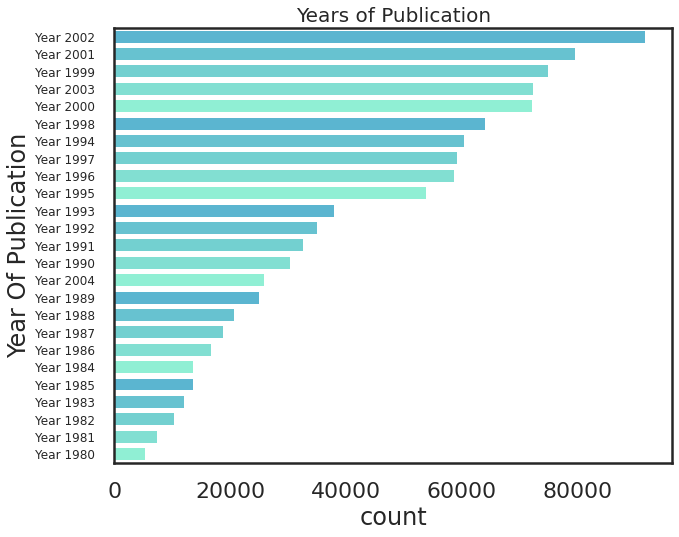

In [41]:
df_v=df[['year_of_publication']].copy()
df_v['year_of_publication'] = df_v['year_of_publication'].astype(int).astype(str)
df_v=df_v['year_of_publication'].value_counts().head(25).reset_index()
df_v.columns=['year','count']
df_v['year']='Year '+df_v['year']

plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=df_v,palette=customPalette)
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()

In [42]:
def barplot(df,col,l):
    df_v=df[col].value_counts().head(25).reset_index()
    df_v.columns=[col,'count']

    plt.figure(figsize=(10,12))
    sns.barplot(x='count',y=col,data=df_v,palette=customPalette)
    plt.ylabel(l)
    plt.title(l,size=20)
    plt.show()

<div class="alert alert-warning" role="alert">
  <h3><strong>Top 25 Books</strong></h3>
</div>

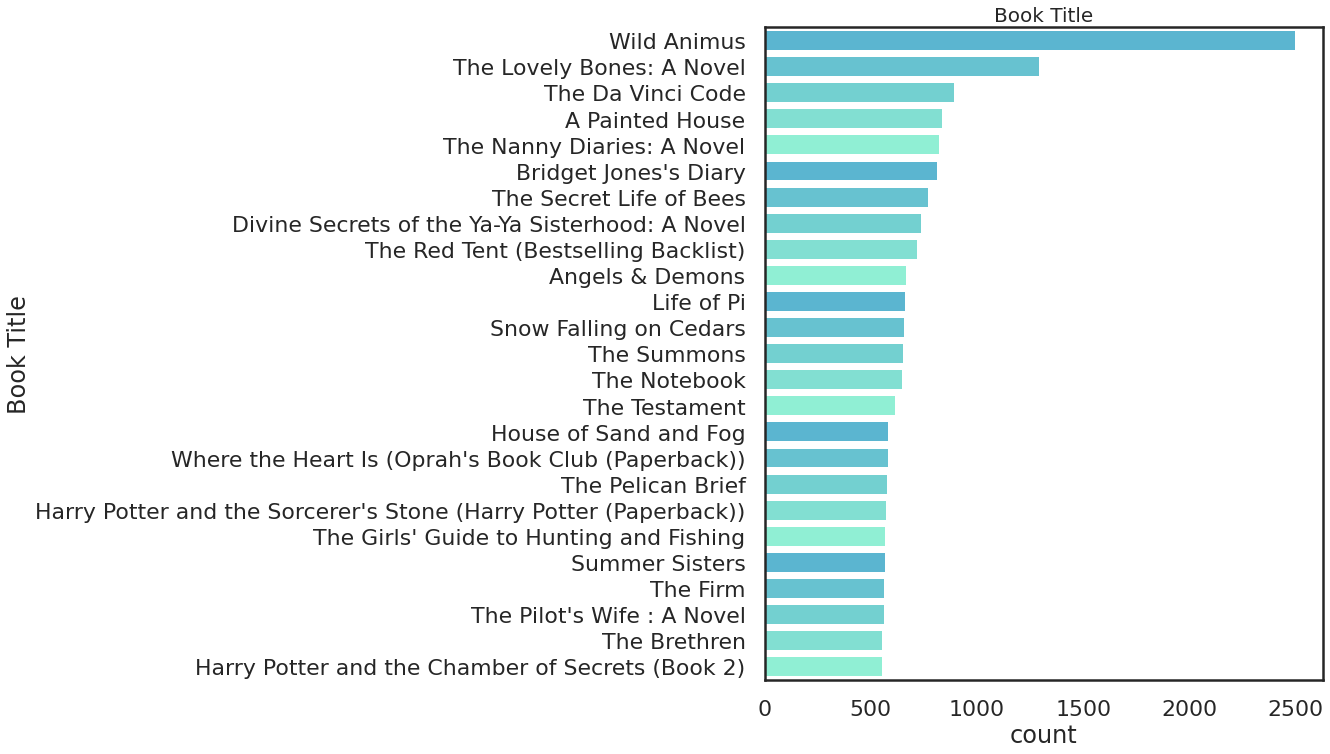

In [43]:
barplot(df,'book_title','Book Title')

<div class="alert alert-warning" role="alert">
  <h3><strong>Top 25 Authors</strong></h3>
</div>

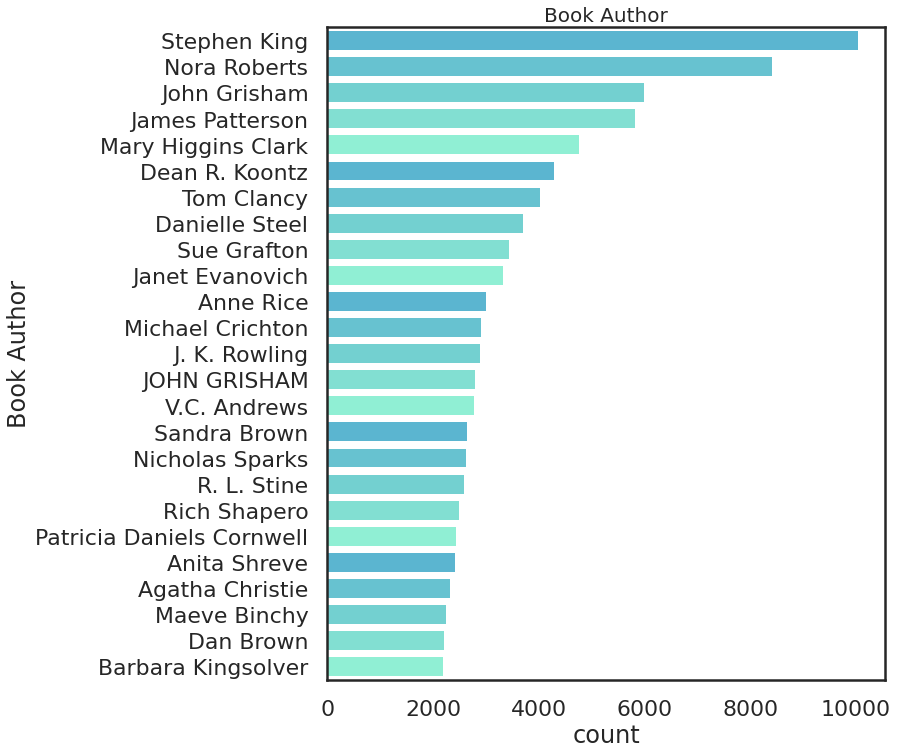

In [44]:
barplot(df,'book_author','Book Author')

<div class="alert alert-warning" role="alert">
  <h3><strong>Top 25 Publishers</strong></h3>
</div>

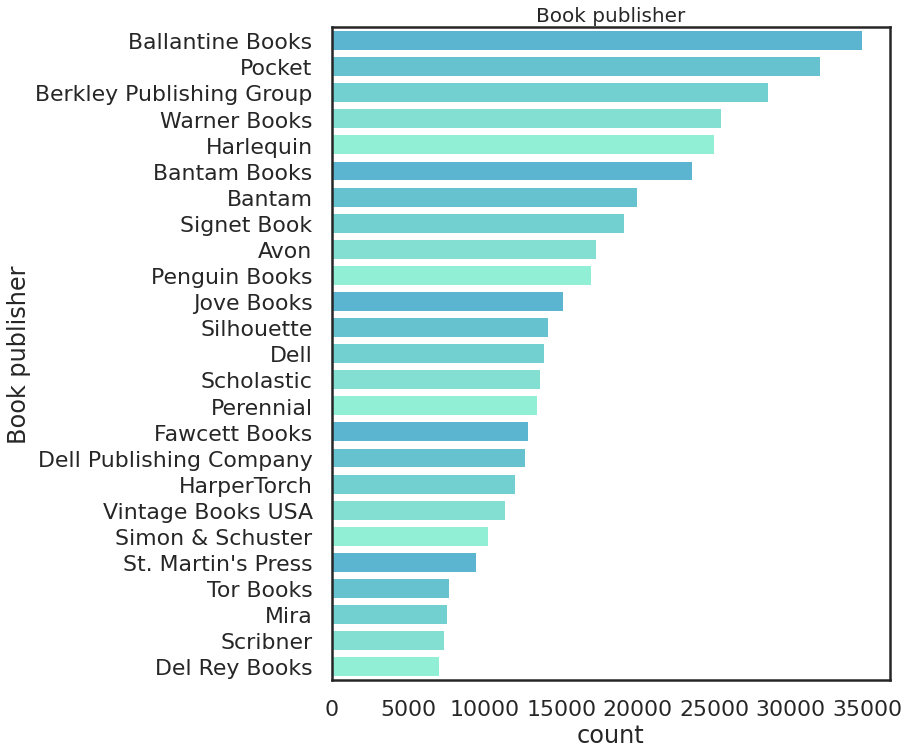

In [45]:
barplot(df,'publisher','Book publisher')

<div class="alert alert-warning" role="alert">
  <h3><strong>Wordcloud of book titles</strong></h3>
</div>

In [46]:
def color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(188)
    s = int(100.0 * 255 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 160)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

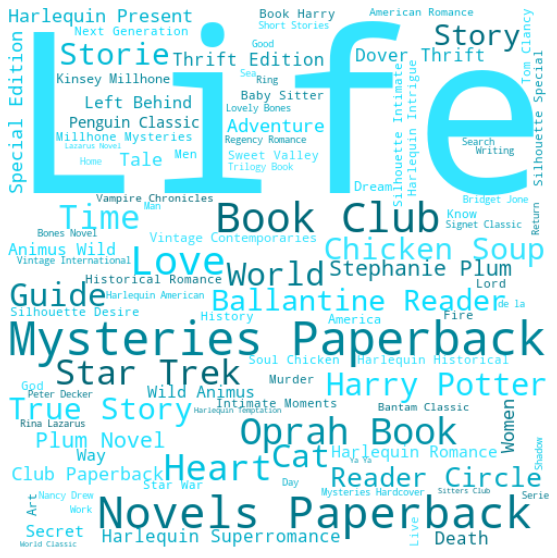

In [47]:
plt.subplots(figsize=(10,10))
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500,color_func=color_func)
wc.generate(' '.join(df['book_title']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()